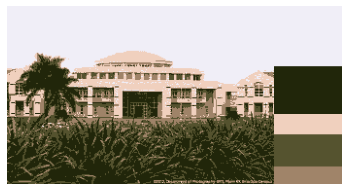

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

img = cv2.imread('img3.jpg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
res2 = cv2.cvtColor(res2, cv2.COLOR_BGR2RGB)
#cv2.imshow('res2',res2)
#plt.axis("off")
#plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
#plt.show()
#cv2.waitKey(0)
#cv2.destroyAllWindows()
height, width = res2.shape[:2]

def find_histogram(clt):
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist
def plot_colors2(hist, centroids):
    bar = np.zeros((70, height, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * height)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 70),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

img = cv2.imread("img3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
clt = KMeans(n_clusters=5) #cluster number
clt.fit(img)

hist = find_histogram(clt)
bar = plot_colors2(hist, clt.cluster_centers_)
bar = cv2.rotate(bar, cv2.ROTATE_90_CLOCKWISE)
bar = cv2.hconcat([res2, bar])
plt.axis("off")
plt.imshow(bar)
plt.show()